In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle

In [2]:
# create df from csv file and take a look at TxDOT data for 1/1/21 - 10/28/21
df = pd.read_csv('texas_2021.csv')
print('shape:', df.shape)
df.head()

shape: (81740, 31)


,Crash_ID,Crash_Fatal,Cmv_Involv,Schl_Bus,Medical_Advisory,Active_School_Zone,Crash_Date,Crash_Time,Rpt_Outside_City_Limit,Rpt_Block_Num,...,Street_Name,Street_Name_2,Day_of_Week,Sus_Serious_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt
0,17562314,N,N,N,N,N,10/28/2021,6:49 AM,N,400,...,FM0544,NaN,THU,0,0,1,3,0,1,0
1,18534544,N,N,N,N,N,10/18/2021,12:33 AM,N,5000,...,IH0045,NaN,MON,0,0,0,1,0,0,0
2,18534557,N,N,N,N,N,10/18/2021,11:35 PM,N,7200,...,IH0035E,NaN,MON,0,0,0,1,0,0,0
3,18534558,N,N,N,N,N,10/18/2021,12:10 AM,N,700,...,US0080,NaN,MON,1,0,0,0,0,1,0
4,18534587,N,N,N,N,N,10/18/2021,12:47 AM,N,100,...,PLAZA DR,NaN,MON,0,0,0,1,0,0,0


In [3]:
# look at some of the df details of the types in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81740 entries, 0 to 81739
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crash_ID                81740 non-null  int64  
 1   Crash_Fatal             81740 non-null  object 
 2   Cmv_Involv              81740 non-null  object 
 3   Schl_Bus                81740 non-null  object 
 4   Medical_Advisory        81740 non-null  object 
 5   Active_School_Zone      81740 non-null  object 
 6   Crash_Date              81740 non-null  object 
 7   Crash_Time              81740 non-null  object 
 8   Rpt_Outside_City_Limit  81740 non-null  object 
 9   Rpt_Block_Num           70547 non-null  object 
 10  Rpt_Street_Pfx          31462 non-null  object 
 11  Rpt_Street_Name         81737 non-null  object 
 12  Rpt_Street_Sfx          58790 non-null  object 
 13  Private_Dr              81740 non-null  object 
 14  Toll_Road               81740 non-null

In [4]:
# changing N and Y to 0 and 1
df = df.replace(to_replace=['N', 'Y'], value=[0,1])

In [5]:
df = df.astype({'Crash_Fatal': 'int64', 'Active_School_Zone': 'int64','Toll_Road': 'int64'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81740 entries, 0 to 81739
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crash_ID                81740 non-null  int64  
 1   Crash_Fatal             81740 non-null  int64  
 2   Cmv_Involv              81740 non-null  int64  
 3   Schl_Bus                81740 non-null  int64  
 4   Medical_Advisory        81740 non-null  int64  
 5   Active_School_Zone      81740 non-null  int64  
 6   Crash_Date              81740 non-null  object 
 7   Crash_Time              81740 non-null  object 
 8   Rpt_Outside_City_Limit  81740 non-null  int64  
 9   Rpt_Block_Num           70547 non-null  object 
 10  Rpt_Street_Pfx          31462 non-null  object 
 11  Rpt_Street_Name         81737 non-null  object 
 12  Rpt_Street_Sfx          58790 non-null  object 
 13  Private_Dr              81740 non-null  int64  
 14  Toll_Road               81740 non-null

In [7]:
print('There are %d missing values in total.' % df.isna().sum().sum())

There are 148504 missing values in total.


In [8]:
#get some detail on the numbers
df.describe()

,Crash_ID,Crash_Fatal,Cmv_Involv,Schl_Bus,Medical_Advisory,Active_School_Zone,Rpt_Outside_City_Limit,Private_Dr,Toll_Road,Crash_Speed_Limit,...,Road_Constr_Zone_Wrkr,Latitude,Longitude,Sus_Serious_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt
count,8.174000e+04,81740.000000,81740.000000,81740.000000,81740.000000,81740.000000,81740.000000,81740.000000,81740.000000,81740.000000,...,81740.000000,73821.000000,73821.000000,81740.000000,81740.000000,81740.000000,81740.000000,81740.000000,81740.000000,81740.000000
mean,1.858636e+07,0.005872,0.067176,0.006190,0.007279,0.002043,0.200807,0.064142,0.017592,42.435564,...,0.011867,30.783681,-97.388447,0.030732,0.133876,0.228627,1.968534,0.197773,0.393235,0.006655
std,2.584818e+04,0.076406,0.250329,0.078435,0.085008,0.045960,0.400607,0.245008,0.131744,17.385819,...,0.108288,1.923241,2.459587,0.200221,0.475819,0.628845,1.848648,0.461445,0.835357,0.093225
min,1.756231e+07,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,-1.000000,...,0.000000,25.862676,-106.631170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.856521e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,...,0.000000,29.651395,-98.224528,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.858657e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,30.223253,-96.964931,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,1.860738e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,...,0.000000,32.679264,-95.528218,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
max,1.864707e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,...,1.000000,36.402066,-93.519716,6.000000,47.000000,29.000000,76.000000,15.000000,70.000000,4.000000


In [9]:
# check the counts for the first df
df.value_counts()

Crash_ID  Crash_Fatal  Cmv_Involv  Schl_Bus  Medical_Advisory  Active_School_Zone  Crash_Date  Crash_Time  Rpt_Outside_City_Limit  Rpt_Block_Num  Rpt_Street_Pfx  Rpt_Street_Name      Rpt_Street_Sfx  Private_Dr  Toll_Road  Crash_Speed_Limit  Road_Constr_Zone  Road_Constr_Zone_Wrkr  Report_Date  Latitude   Longitude    Street_Name        Street_Name_2               Day_of_Week  Sus_Serious_Injry_Cnt  Nonincap_Injry_Cnt  Poss_Injry_Cnt  Non_Injry_Cnt  Unkn_Injry_Cnt  Tot_Injry_Cnt  Death_Cnt
18534603  0            0           0         0                 0                   10/18/2021  1:07 AM     0                       2200           NE              LOOP 338 ON RAMP NB  LOOP            0           0          30                 0                 0                      10/18/2021   31.876094  -102.309894  BAINBRIDGE DR      UNKNOWN                     MON          0                      0                   0               1              0               0              0            1
1860018

In [10]:
wrangle.summarize(df)

There are total of 148504 missing values in the entire dataframe.

-------------------


Dataframe head: 
|    |   Crash_ID |   Crash_Fatal |   Cmv_Involv |   Schl_Bus |   Medical_Advisory |   Active_School_Zone | Crash_Date   | Crash_Time   |   Rpt_Outside_City_Limit |   Rpt_Block_Num | Rpt_Street_Pfx   | Rpt_Street_Name   | Rpt_Street_Sfx   |   Private_Dr |   Toll_Road |   Crash_Speed_Limit |   Road_Constr_Zone |   Road_Constr_Zone_Wrkr | Report_Date   |   Latitude |   Longitude | Street_Name   |   Street_Name_2 | Day_of_Week   |   Sus_Serious_Injry_Cnt |   Nonincap_Injry_Cnt |   Poss_Injry_Cnt |   Non_Injry_Cnt |   Unkn_Injry_Cnt |   Tot_Injry_Cnt |   Death_Cnt |
|---:|-----------:|--------------:|-------------:|-----------:|-------------------:|---------------------:|:-------------|:-------------|-------------------------:|----------------:|:-----------------|:------------------|:-----------------|-------------:|------------:|--------------------:|-------------------:|-------------

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81740 entries, 0 to 81739
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crash_ID                81740 non-null  int64  
 1   Crash_Fatal             81740 non-null  int64  
 2   Cmv_Involv              81740 non-null  int64  
 3   Schl_Bus                81740 non-null  int64  
 4   Medical_Advisory        81740 non-null  int64  
 5   Active_School_Zone      81740 non-null  int64  
 6   Crash_Date              81740 non-null  object 
 7   Crash_Time              81740 non-null  object 
 8   Rpt_Outside_City_Limit  81740 non-null  int64  
 9   Rpt_Block_Num           70547 non-null  object 
 10  Rpt_Street_Pfx          31462 non-null  object 
 11  Rpt_Street_Name         81737 non-null  object 
 12  Rpt_Street_Sfx          58790 non-null  object 
 13  Private_Dr              81740 non-null  int64  
 14  Toll_Road               81740 non-null

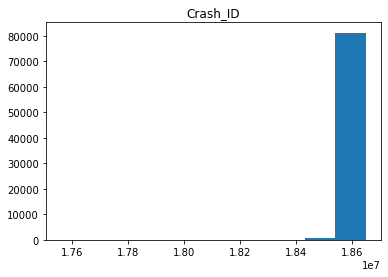

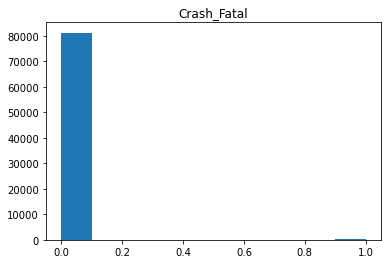

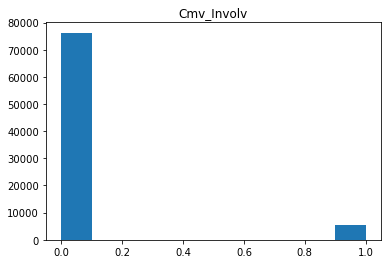

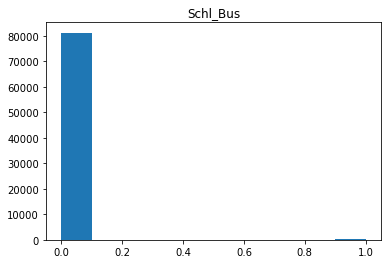

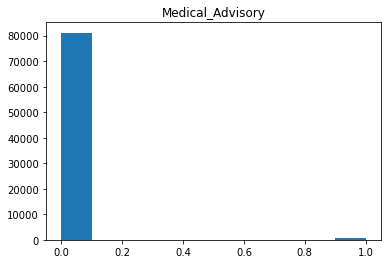

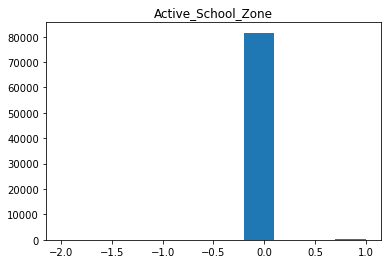

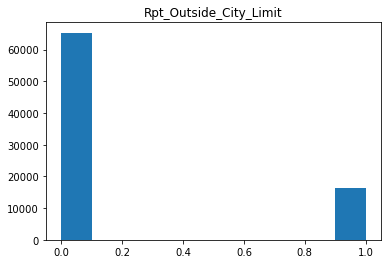

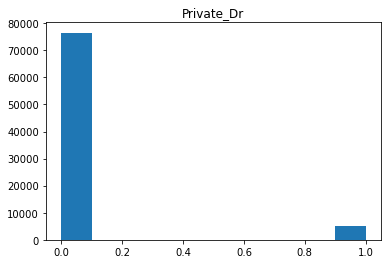

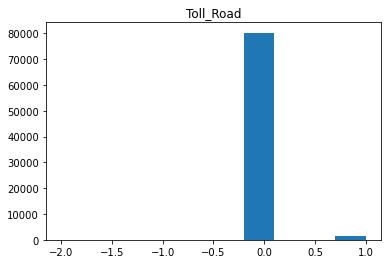

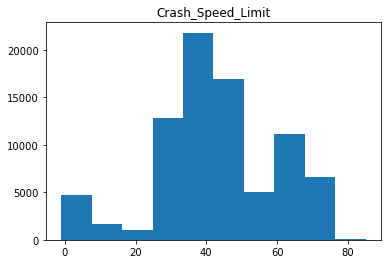

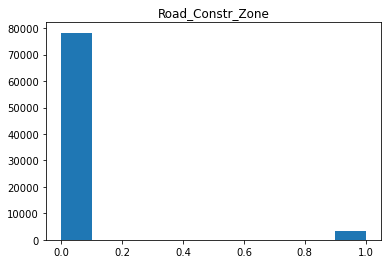

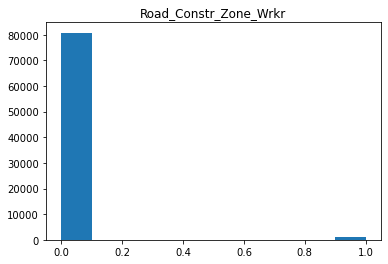

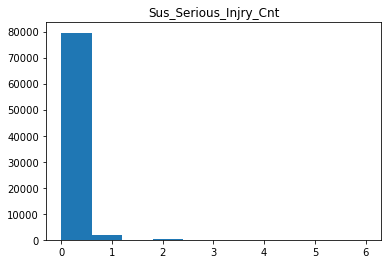

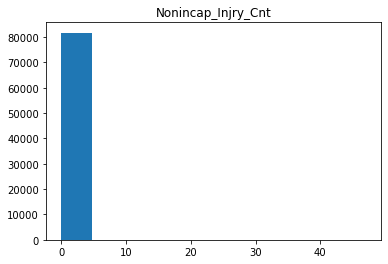

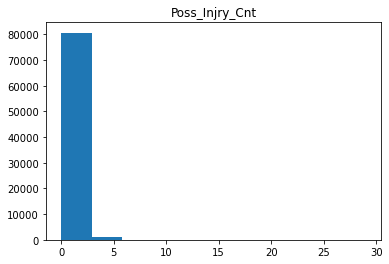

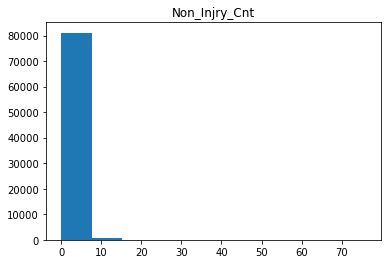

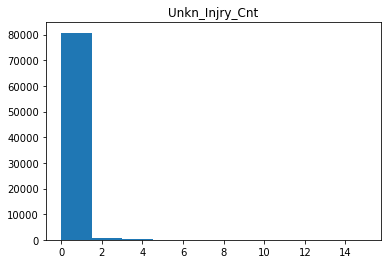

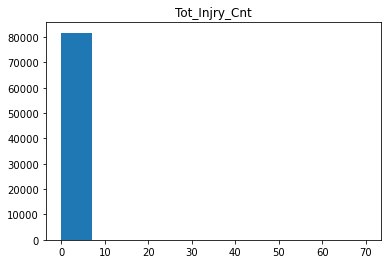

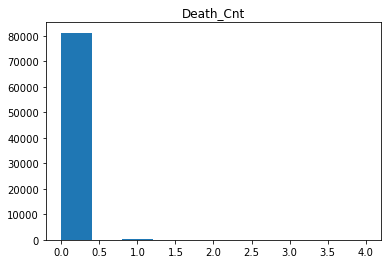

In [12]:
num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()